In [1]:
import pandas as pd 
import numpy as np 

In [35]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [36]:
import missingno
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate

In [39]:
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\Mall_Customers (2).csv')

In [4]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.shape

(200, 5)

<AxesSubplot:>

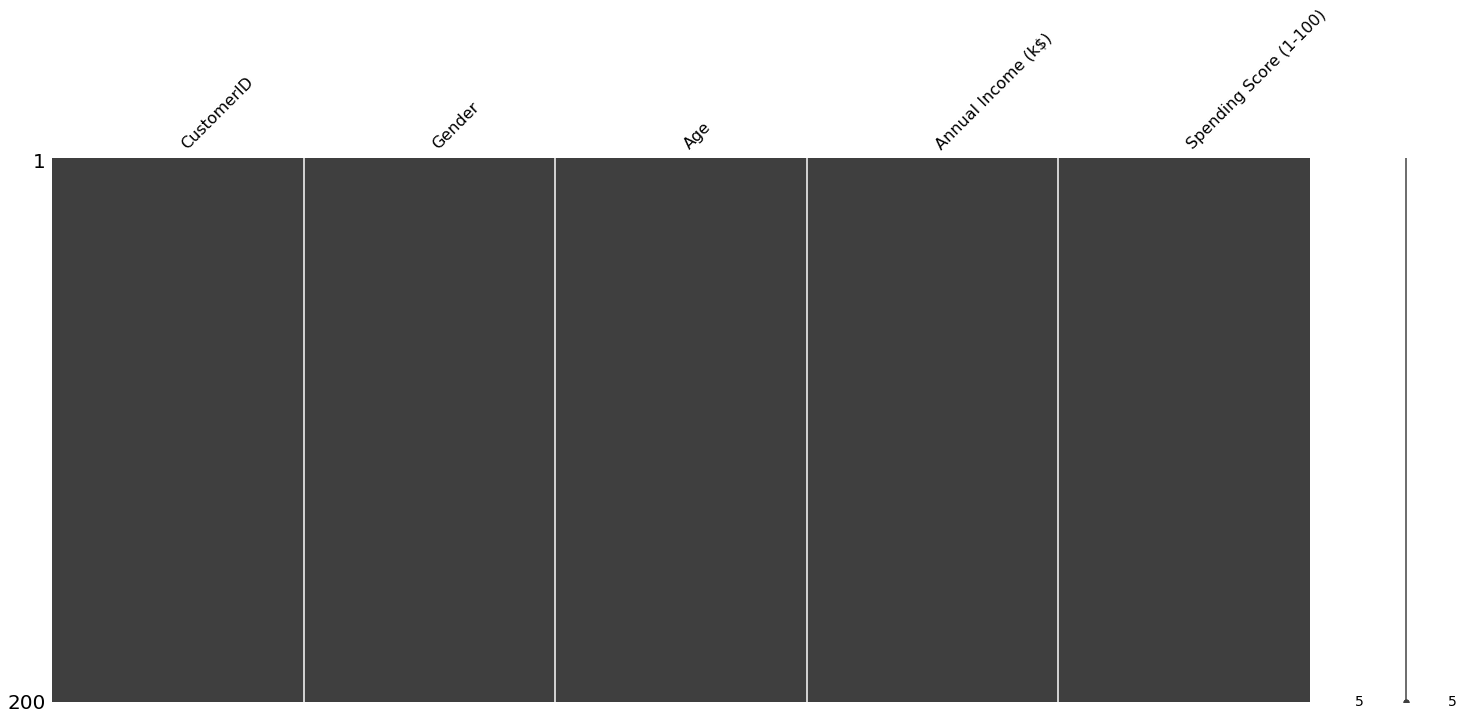

In [37]:
missingno.matrix(data)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.sum().isnull()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [13]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

<AxesSubplot:>

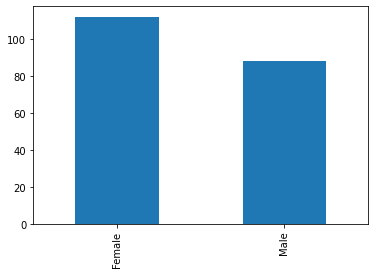

In [12]:
df['Gender'].value_counts().plot(kind='bar')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


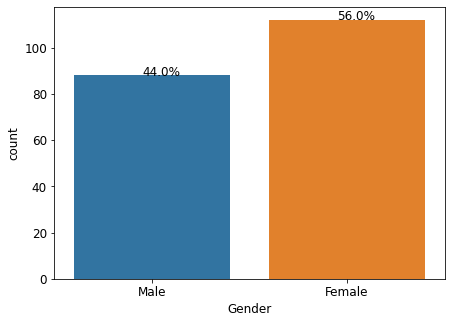

In [14]:
plt.figure(figsize = (7,5)) 
ax = sns.countplot('Gender', data = data) 
plt.xticks (size = 12) 
plt.xlabel('Gender', size = 12) 
plt.yticks (size = 12) 
plt.ylabel('count', size = 12)
without_hue (ax, df.Gender)

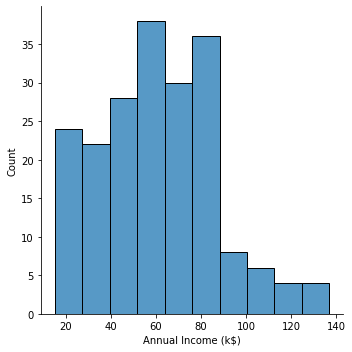

In [15]:
sns.displot(data['Annual Income (k$)'])

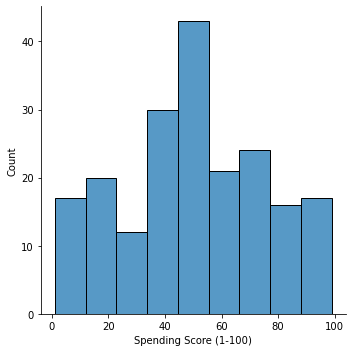

In [17]:
sns.displot(data['Spending Score (1-100)'])

In [16]:
gender_income = df[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


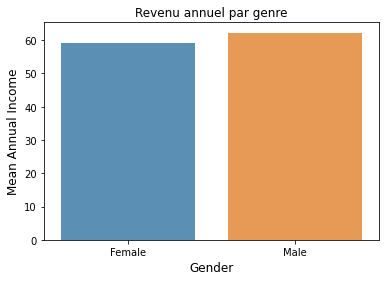

In [20]:
sns.barplot(gender_income['Gender'], gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Revenu annuel par genre')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [22]:
gender_score = data[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



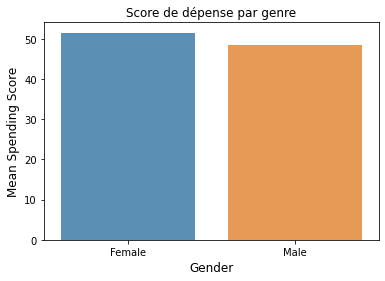

In [68]:
### Mean Spending Score by Gender

sns.barplot(gender_score['Gender'], gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Score de dépense par genre')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [25]:
### Mean Age by Gender

gender_age = data[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


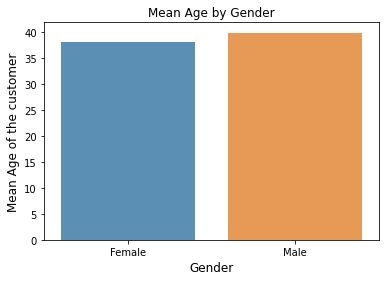

In [26]:
## Mean Age by Gender

sns.barplot(gender_age['Gender'], gender_age['Age'], alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [31]:
import scipy.stats as stats

Text(0.5, 1.0, 'Histogramme de la variable age')

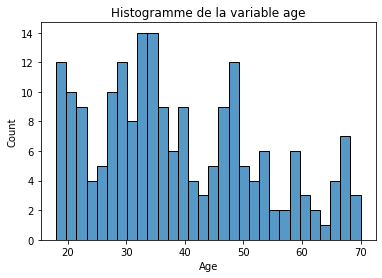

In [47]:
sns.histplot(df['Age'], bins = 30)
plt.title('Histogramme de la variable age')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

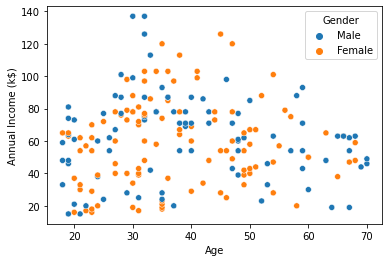

In [48]:
### Scatterplot between Age and Annual Income

sns.scatterplot(data = df, x = "Age", y = "Annual Income (k$)", hue = "Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

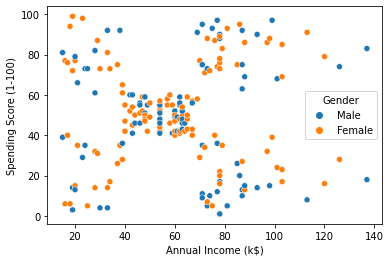

In [49]:
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

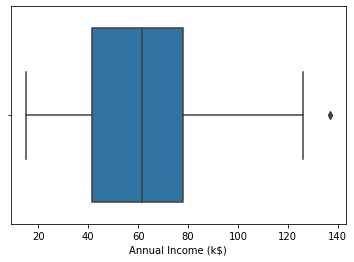

In [50]:
sns.boxplot(df['Annual Income (k$)'])

In [51]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(df, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


In [52]:
df.drop(['CustomerID'], axis = 1, inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [53]:
### Filtering the age and spending score from the dataset

X = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


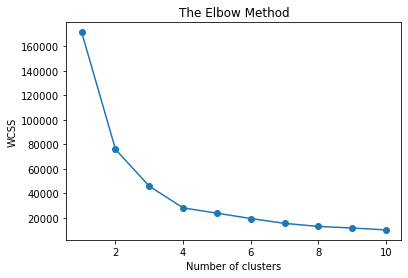

In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

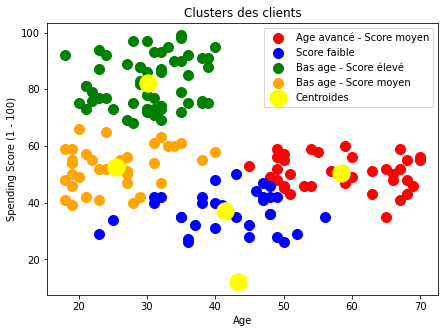

In [74]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Age avancé - Score moyen')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Score faible ')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Bas age - Score élevé')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Bas age - Score moyen')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clusters des clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 5 clusters.

High Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to 40+ age group and have a 35 - 60 spending score.
Low Score customers: These are the customers that do not spend a lot in the mall. The target of the mall should be to reduce the number of customers in the blue cluster.
Low Age - High Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age group and have a spending score greater than 70.
Low Age - Medium Score customers: From this cluster, we can see that the customers belonging to this cluster belong to <40 age and have a spending score in the range of 35 and 65.

In [58]:
### Filtering the annual income and spending score from the dataset

X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


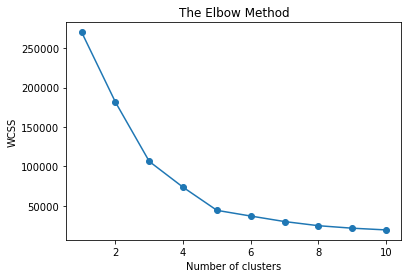

In [59]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

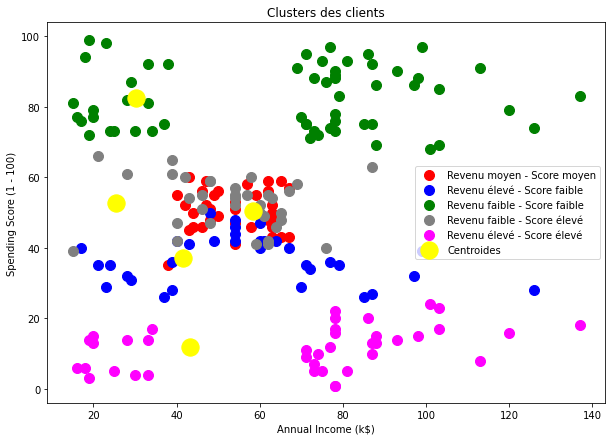

In [76]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X1[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Revenu moyen - Score moyen')
plt.scatter(X1[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Revenu élevé - Score faible')
plt.scatter(X1[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Revenu faible - Score faible')
plt.scatter(X1[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'Revenu faible - Score élevé')
plt.scatter(X1[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Revenu élevé - Score élevé')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clusters des clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

From the above graph, we can see that there are 5 clusters.

Medium Income - Medium Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of 40 - 80 and have a spending score in the range of 40 - 60.
High Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 65 and have a spending score of less than 40.
Low Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of less than 40.
Low Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of greater than 60.
High Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 70 and have a spending score of greater than 60.
The aim of the mall is to increase the customers present in the cluster 'High Income - High Score' by reducing the customers present in the cluster 'High Income - Low Score' and also to migrate the customers present in the cluster 'Medium Income - Medium Score' to higher spending scores.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



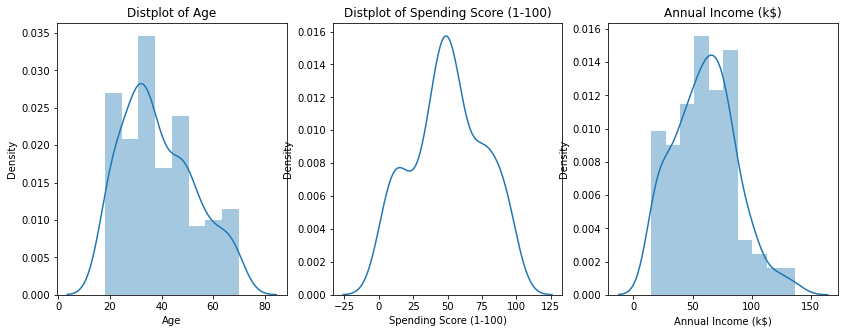

In [63]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(df['Spending Score (1-100)'],hist=False)
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()